<a href="https://colab.research.google.com/github/TUCchkul/PyTorch_Tutorial/blob/main/PyTorch_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import transforms, datasets
import torch.nn.functional as F
from sklearn.metrics import confusion_matrix
from tqdm import tqdm

In [65]:
%cd /content/drive/MyDrive/Pytorch

/content/drive/MyDrive/Pytorch


In [66]:
!pwd

/content/drive/MyDrive/Pytorch


In [67]:
class Config:
  def __init__(self):
    self.ROOT_DATA_DIR="FashionMNIST"
    self.EPOCH=30
    self.LEARNING_RATE=0.001
    self.BATCH_SIZE=32
    self.IMAGE_SIZE=(28,28)
    self.DEVICE="cuda" if torch.cuda.is_available() else "CPU"
    print(f"THis notebook is using the device: {self.DEVICE}")
    self.SEED=2022
config=Config()



THis notebook is using the device: cuda


In [68]:
# Download the data
train_data=datasets.FashionMNIST(
    root=config.ROOT_DATA_DIR,
    train=True,
    download=True,
    transform=transforms.ToTensor()
)
test_data=datasets.FashionMNIST(
    root=config.ROOT_DATA_DIR,
    train=False,
    download=True, 
    transform=transforms.ToTensor()
)

In [69]:
train_data.data.shape

torch.Size([60000, 28, 28])

In [70]:
test_data.data.shape

torch.Size([10000, 28, 28])

In [71]:
train_data.class_to_idx

{'Ankle boot': 9,
 'Bag': 8,
 'Coat': 4,
 'Dress': 3,
 'Pullover': 2,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'T-shirt/top': 0,
 'Trouser': 1}

In [72]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [73]:
given_label_data=train_data.class_to_idx
given_label_data

{'Ankle boot': 9,
 'Bag': 8,
 'Coat': 4,
 'Dress': 3,
 'Pullover': 2,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'T-shirt/top': 0,
 'Trouser': 1}

In [74]:
label_map={val:key for key, val in given_label_data.items()}
label_map

{0: 'T-shirt/top',
 1: 'Trouser',
 2: 'Pullover',
 3: 'Dress',
 4: 'Coat',
 5: 'Sandal',
 6: 'Shirt',
 7: 'Sneaker',
 8: 'Bag',
 9: 'Ankle boot'}

In [75]:
train_data.data[2].shape

torch.Size([28, 28])

In [76]:
label_map.items()

dict_items([(0, 'T-shirt/top'), (1, 'Trouser'), (2, 'Pullover'), (3, 'Dress'), (4, 'Coat'), (5, 'Sandal'), (6, 'Shirt'), (7, 'Sneaker'), (8, 'Bag'), (9, 'Ankle boot')])

In [77]:
label_map[0]

'T-shirt/top'

In [78]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [79]:
train_data.targets[0]

tensor(9)

In [80]:
train_data.targets[0].item()

9

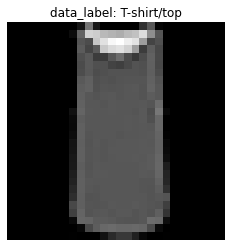

In [81]:
def view_sample_img(data, idx, label_map):

  plt.imshow(data.data[idx], cmap="gray")
  plt.title(f"data_label: {label_map[data.targets[idx].item()]}")
  plt.axis("off")
view_sample_img(train_data,2, label_map)

In [82]:
# Create DataLoader
train_data_loader=DataLoader(
    dataset=train_data,
    batch_size=config.BATCH_SIZE,
    shuffle=True
)
test_data_loader=DataLoader(
    dataset=test_data,
    batch_size=config.BATCH_SIZE,
    shuffle=False
)

In [83]:
for images, labels in train_data_loader:
  print(images.shape)
  print(labels.shape)
  break


torch.Size([32, 1, 28, 28])
torch.Size([32])


In [84]:
images[0]

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [85]:
images[0].shape

torch.Size([1, 28, 28])

In [86]:
images[0].squeeze().shape

torch.Size([28, 28])

In [87]:
images[0].squeeze().shape, images[0].unsqueeze(dim=1).shape

(torch.Size([28, 28]), torch.Size([1, 1, 28, 28]))

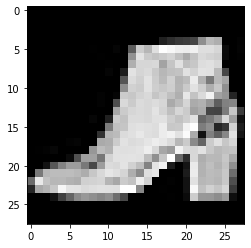

In [88]:
plt.imshow(images[0].squeeze(), cmap="gray")

In [89]:
images[0].squeeze().numpy()

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [90]:
class CNN(nn.Module):
  def __init__(self, in_, out_):
    super(CNN, self).__init__()
    self.conv_pool_01=nn.Sequential(
        nn.Conv2d(in_channels=in_,out_channels=8, kernel_size=5, stride=1, padding=0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2)

    )
    self.conv_pool_02=nn.Sequential(
        nn.Conv2d(in_channels=8,out_channels=16, kernel_size=5, stride=1, padding=0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,stride=2)
    )
    self.Flatten=nn.Flatten()
    self.FC_01=nn.Linear(in_features=16*4*4, out_features=128)
    self.FC_02=nn.Linear(in_features=128, out_features=64)
    self.FC_03=nn.Linear(in_features=64,out_features=out_)
  def forward(self,x):
    x=self.conv_pool_01(x)
    x=self.conv_pool_02(x)
    x=self.Flatten(x)
    x=F.relu(self.FC_01(x))
    x=F.relu(self.FC_02(x))
    x=F.relu(self.FC_03(x))
    return x

In [91]:
model=CNN(1,10)
print(model)

CNN(
  (conv_pool_01): Sequential(
    (0): Conv2d(1, 8, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_pool_02): Sequential(
    (0): Conv2d(8, 16, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (Flatten): Flatten(start_dim=1, end_dim=-1)
  (FC_01): Linear(in_features=256, out_features=128, bias=True)
  (FC_02): Linear(in_features=128, out_features=64, bias=True)
  (FC_03): Linear(in_features=64, out_features=10, bias=True)
)


In [92]:
next(model.parameters()).is_cuda

False

In [93]:
model.to(config.DEVICE)

CNN(
  (conv_pool_01): Sequential(
    (0): Conv2d(1, 8, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_pool_02): Sequential(
    (0): Conv2d(8, 16, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (Flatten): Flatten(start_dim=1, end_dim=-1)
  (FC_01): Linear(in_features=256, out_features=128, bias=True)
  (FC_02): Linear(in_features=128, out_features=64, bias=True)
  (FC_03): Linear(in_features=64, out_features=10, bias=True)
)

In [94]:
next(model.parameters()).is_cuda

True

In [100]:
#Checking how many trainble parameters in a model
def count_params(model):
  model_params={"Modules":list(), "Parameters":list()}
  total={"trainable":0, "non_trainable":0}
  for name, parameters in model.named_parameters():
    param=parameters.numel()
    if not parameters.requires_grad:
      total["non_trainable"] +=param

      continue
    
    model_params["Modules"].append(name)
    model_params["Parameters"].append(param)
    total["trainable"] +=param
  df=pd.DataFrame(model_params)
  df=df.style.set_caption(f"Total trainable parameters: {total}")
  return df
count_params(model)

,Modules,Parameters
0,conv_pool_01.0.weight,200
1,conv_pool_01.0.bias,8
2,conv_pool_02.0.weight,3200
3,conv_pool_02.0.bias,16
4,FC_01.weight,32768
5,FC_01.bias,128
6,FC_02.weight,8192
7,FC_02.bias,64
8,FC_03.weight,640
9,FC_03.bias,10
